In [5]:
import re # regular Expression
import ast # literals ko proper format me convert krta h
import pickle

import numpy as np
import pandas as pd
import streamlit as st

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [6]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [7]:
movies.head() # Contain many diff datatypes

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
credits.head() # pretty organised

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
movies.shape

(4803, 20)

In [10]:
credits.shape

(4803, 4)

In [11]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [12]:
credits.columns # title column common => merge

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [13]:
movies['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [14]:
credits['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [15]:
# merge the dataframes
movies = movies.merge(credits, on='title')

In [16]:
movies.head() # before 20 columns now 23 columns/features

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# choosing relevant features for movie recommendation

## Final features

In [19]:
df = movies[['genres', 'movie_id', 'keywords', 'title', 'overview', 'cast', 'crew']]
df.head(3) 

,genres,movie_id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


# Goal: movie_id + title + tags

In [21]:
df['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: overview, Length: 4809, dtype: object

In [22]:
df['overview'][0] #avatar movie

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [23]:
df['genres'] # literals

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4804    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4805    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4806    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4807                                                   []
4808                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4809, dtype: object

In [24]:
df['genres'][0] 

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [25]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [26]:
df['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [27]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

# cleaning the data

## Genres

In [30]:
# start with genres
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [31]:
ast.literal_eval(df['genres'][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [32]:
for i in ast.literal_eval(df['genres'][0]):
    print(i['name'])

Action
Adventure
Fantasy
Science Fiction


In [33]:
def fetch_genres(text):

    l = [] 
    
    for i in ast.literal_eval(text):
        l.append(i['name'])

    return l

In [34]:
fetch_genres(df['genres'][0])

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [35]:
df['genres'].apply(fetch_genres) # inbuilt function

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4809, dtype: object

In [36]:
df[:3] #not permanent change 

,genres,movie_id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [37]:
df['genres'] = df['genres'].apply(fetch_genres)

In [38]:
df[:3]

,genres,movie_id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Keywords

In [40]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [41]:
ast.literal_eval(df['keywords'][0])

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [42]:
def fetch_keywords(text):

    l = [] 
    
    for i in ast.literal_eval(text):
        l.append(i['name'])

    return l

In [43]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [44]:
df['keywords'] = df['keywords'].apply(fetch_keywords)

In [45]:
df['keywords'][0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

# Missing values

In [47]:
df.isna().sum()

genres      0
movie_id    0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [48]:
df = df.dropna()

In [49]:
df.isna().sum()

genres      0
movie_id    0
keywords    0
title       0
overview    0
cast        0
crew        0
dtype: int64

In [50]:
df[:3]

,genres,movie_id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Cast

In [52]:
df['cast'][0] # only return names of first three characters

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [53]:
def fetch(text):

    l = [] 
    
    for i in ast.literal_eval(text):
        l.append(i['name'])

    return l

In [54]:
fetch(df['cast'][0]) # we don't need names of all side characters that's why we consider only first three

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez',
 'Giovanni Ribisi',
 'Joel David Moore',
 'CCH Pounder',
 'Wes Studi',
 'Laz Alonso',
 'Dileep Rao',
 'Matt Gerald',
 'Sean Anthony Moran',
 'Jason Whyte',
 'Scott Lawrence',
 'Kelly Kilgour',
 'James Patrick Pitt',
 'Sean Patrick Murphy',
 'Peter Dillon',
 'Kevin Dorman',
 'Kelson Henderson',
 'David Van Horn',
 'Jacob Tomuri',
 'Michael Blain-Rozgay',
 'Jon Curry',
 'Luke Hawker',
 'Woody Schultz',
 'Peter Mensah',
 'Sonia Yee',
 'Jahnel Curfman',
 'Ilram Choi',
 'Kyla Warren',
 'Lisa Roumain',
 'Debra Wilson',
 'Chris Mala',
 'Taylor Kibby',
 'Jodie Landau',
 'Julie Lamm',
 'Cullen B. Madden',
 'Joseph Brady Madden',
 'Frankie Torres',
 'Austin Wilson',
 'Sara Wilson',
 'Tamica Washington-Miller',
 'Lucy Briant',
 'Nathan Meister',
 'Gerry Blair',
 'Matthew Chamberlain',
 'Paul Yates',
 'Wray Wilson',
 'James Gaylyn',
 'Melvin Leno Clark III',
 'Carvon Futrell',
 'Brandon Jelkes',
 'Mica

In [55]:
def fetch_cast(text):

    l = [] 
    count = 0 
    
    for i in ast.literal_eval(text):
        if count != 3:
            l.append(i['name'])
            count += 1
        else:
            break

    return l

In [56]:
fetch_cast(df['cast'][0]) 

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [57]:
df['cast'] = df['cast'].apply(fetch_cast)

In [58]:
df['cast']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [59]:
df[:3]

,genres,movie_id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Now we sort Crew

In [61]:
df['crew'][0] # here we will only consider director

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [62]:
def fetch_director(text):
    l = []

    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            l.append(i['name'])
    return l

In [63]:
fetch_director(df['crew'][0]) # function works

['James Cameron']

In [64]:
# apply on the feature as a whole
df['crew'] = df['crew'].apply(fetch_director)

In [65]:
df['crew'][:3]

0     [James Cameron]
1    [Gore Verbinski]
2        [Sam Mendes]
Name: crew, dtype: object

In [66]:
df[:3]

,genres,movie_id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


# Overview

In [68]:
df['overview'] # we will create a list of words from string using split

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: overview, Length: 4806, dtype: object

In [69]:
'i am a girl'

'i am a girl'

In [70]:
'i am a girl'.split()

['i', 'am', 'a', 'girl']

In [71]:
''.join(['i', 'am', 'a', 'girl'])

'iamagirl'

In [72]:
' '.join(['i', 'am', 'a', 'girl'])

'i am a girl'

In [73]:
','.join(['i', 'am', 'a', 'girl'])

'i,am,a,girl'

## Create a lambda function

In [75]:
df['overview'] = df['overview'].apply(lambda x: x.split())

In [76]:
df[:3]

,genres,movie_id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


- We're done prepping and cleaning the data
- Now we create a new dataframe containing the features: title, tags (which will be made from keywords-crew)

In [78]:
[4] + [74] + ['a string'] # similarly we combine all these lists

[4, 74, 'a string']

In [79]:
# but before combining, we need to remove all the spaces between the same word (eg. first name and last name) 
# this is done because words separatd with whitespaces will be considered as entirely different things 

In [80]:
df['tags'] = df['overview'] + df['genres'] + df['cast'] + df['crew'] + df['keywords']

In [81]:
# (df['overview'] + df['genres'] + df['cast'] + df['crew'] + df['keywords'])[0]

In [82]:
df

,genres,movie_id,keywords,title,overview,cast,crew,tags
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],"[Following, the, death, of, District, Attorney..."
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...
4804,"[Action, Crime, Thriller]",9367,"[united states–mexico barrier, legs, arms, pap...",El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez],"[El, Mariachi, just, wants, to, play, his, gui..."
4805,"[Comedy, Romance]",72766,[],Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns],"[A, newlywed, couple's, honeymoon, is, upended..."
4806,"[Comedy, Drama, Romance, TV Movie]",231617,"[date, love at first sight, narration, investi...","Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith],"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,[],126186,[],Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...","[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia],"[When, ambitious, New, York, attorney, Sam, is..."


## Final Dataframe

In [84]:
data = df[['movie_id','title','tags']]
data[:3]

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."


In [85]:
print(data['tags'][0])

['In', 'the', '22nd', 'century,', 'a', 'paraplegic', 'Marine', 'is', 'dispatched', 'to', 'the', 'moon', 'Pandora', 'on', 'a', 'unique', 'mission,', 'but', 'becomes', 'torn', 'between', 'following', 'orders', 'and', 'protecting', 'an', 'alien', 'civilization.', 'Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'James Cameron', 'culture clash', 'future', 'space war', 'space colony', 'society', 'space travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien planet', 'cgi', 'marine', 'soldier', 'battle', 'love affair', 'anti war', 'power relations', 'mind and soul', '3d']


In [ ]:
# this is done because words separated by spaces are treated as different when we vectorise

In [87]:
data['tags'].apply(lambda x: [i.replace(' ', '') for i in x]) #list doesn't have replace method, string does

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4806, dtype: object

In [88]:
data['tags'] = data['tags'].apply(lambda x: [i.replace(' ', '') for i in x]) 

In [89]:
data['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d']

In [90]:
# to convert it back to string

In [91]:
data['tags'].apply(lambda x: ' '.join(x))

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [92]:
data['tags'] = data['tags'].apply(lambda x: ' '.join(x))

In [93]:
data

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [94]:
data['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction SamWorthington ZoeSaldana SigourneyWeaver JamesCameron cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

# NLP concepts to preprocess the data

In [96]:
# similar words are treated differently: love lover lovable etc  act, action, actionable, actions etc
# model treats them differently and that complicates it

# tasks:
- convert everything into lowercase
- tokenization
- stemming
- stopwords removal

In [98]:
data[:5]

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [99]:
def preprocess_text(text):
    updated_text = []
    for i in text.split():
        lower = i.lower()
        updated_text.append(lower)
        
    return updated_text

In [100]:
print(preprocess_text(data['tags'][0]))

['in', 'the', '22nd', 'century,', 'a', 'paraplegic', 'marine', 'is', 'dispatched', 'to', 'the', 'moon', 'pandora', 'on', 'a', 'unique', 'mission,', 'but', 'becomes', 'torn', 'between', 'following', 'orders', 'and', 'protecting', 'an', 'alien', 'civilization.', 'action', 'adventure', 'fantasy', 'sciencefiction', 'samworthington', 'zoesaldana', 'sigourneyweaver', 'jamescameron', 'cultureclash', 'future', 'spacewar', 'spacecolony', 'society', 'spacetravel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marine', 'soldier', 'battle', 'loveaffair', 'antiwar', 'powerrelations', 'mindandsoul', '3d']


# 21st July

## Stemming

- act, action, actions, actionable, etc (derived from act = root word) 
consider only root words, drop all others => Stemming

In [104]:
ps = PorterStemmer()
def preprocess_text(text):
    updated_text = []
    for i in text.split():
        lower = i.lower()
        updated_text.append(ps.stem(lower))
        
    return ' '.join(updated_text)

In [105]:
print(preprocess_text(data['tags'][0])) # ing, ed words short kr diye

in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict samworthington zoesaldana sigourneyweav jamescameron cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d


In [106]:
data['tags'] = data['tags'].apply(preprocess_text)

In [107]:
data['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict samworthington zoesaldana sigourneyweav jamescameron cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d'

In [108]:
data

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q..."
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


## for NLP, we need to encode this tags to numerical form for it to work

# Bag of Words (BOW) method

In [111]:
cv = CountVectorizer(max_features = 5000, stop_words='english') 

In [112]:
data['tags']

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [113]:
cv.fit_transform(data['tags'])

<4806x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 145432 stored elements in Compressed Sparse Row format>

In [114]:
# to show this we use toarray
vectors = cv.fit_transform(data['tags']).toarray()

vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [115]:
vectors.shape

(4806, 5000)

In [116]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [117]:
for i in cv.get_feature_names_out():
    print(i) #on behalf of these words recommendation system will recommend

000
007
10
100
11
12
13
14
15
16
17
17th
18
18th
18thcenturi
19
1910
1920
1930
1940
1944
1950
1950s
1960
1960s
1970
1970s
1971
1974
1976
1980
1985
1990
1999
19th
19thcenturi
20
200
2003
2009
20th
21st
23
24
25
30
300
3d
40
50
500
60
70
80
aaron
aaroneckhart
abandon
abduct
abigailbreslin
abil
abl
aboard
abov
abus
academ
academi
accept
access
accid
accident
acclaim
accompani
accomplish
account
accus
ace
achiev
acquaint
act
action
actionhero
activ
activist
activities
actor
actress
actual
ad
adam
adamsandl
adamshankman
adapt
add
addict
adjust
admir
admit
adolesc
adopt
ador
adrienbrodi
adult
adultanim
adulteri
adulthood
advanc
adventur
adventure
adventures
advertis
advic
advis
affair
affect
afghanistan
africa
african
africanamerican
aftercreditssting
afterlif
aftermath
ag
age
agediffer
agenc
agency
agenda
agent
agents
aggress
ago
agre
ahead
aid
aidanquinn
ail
aim
air
airplan
airplanecrash
airport
aka
al
alabama
alan
alaska
albert
alcatraz
alcohol
alecbaldwin
alex
alexkendrick
alfredhitchcoc

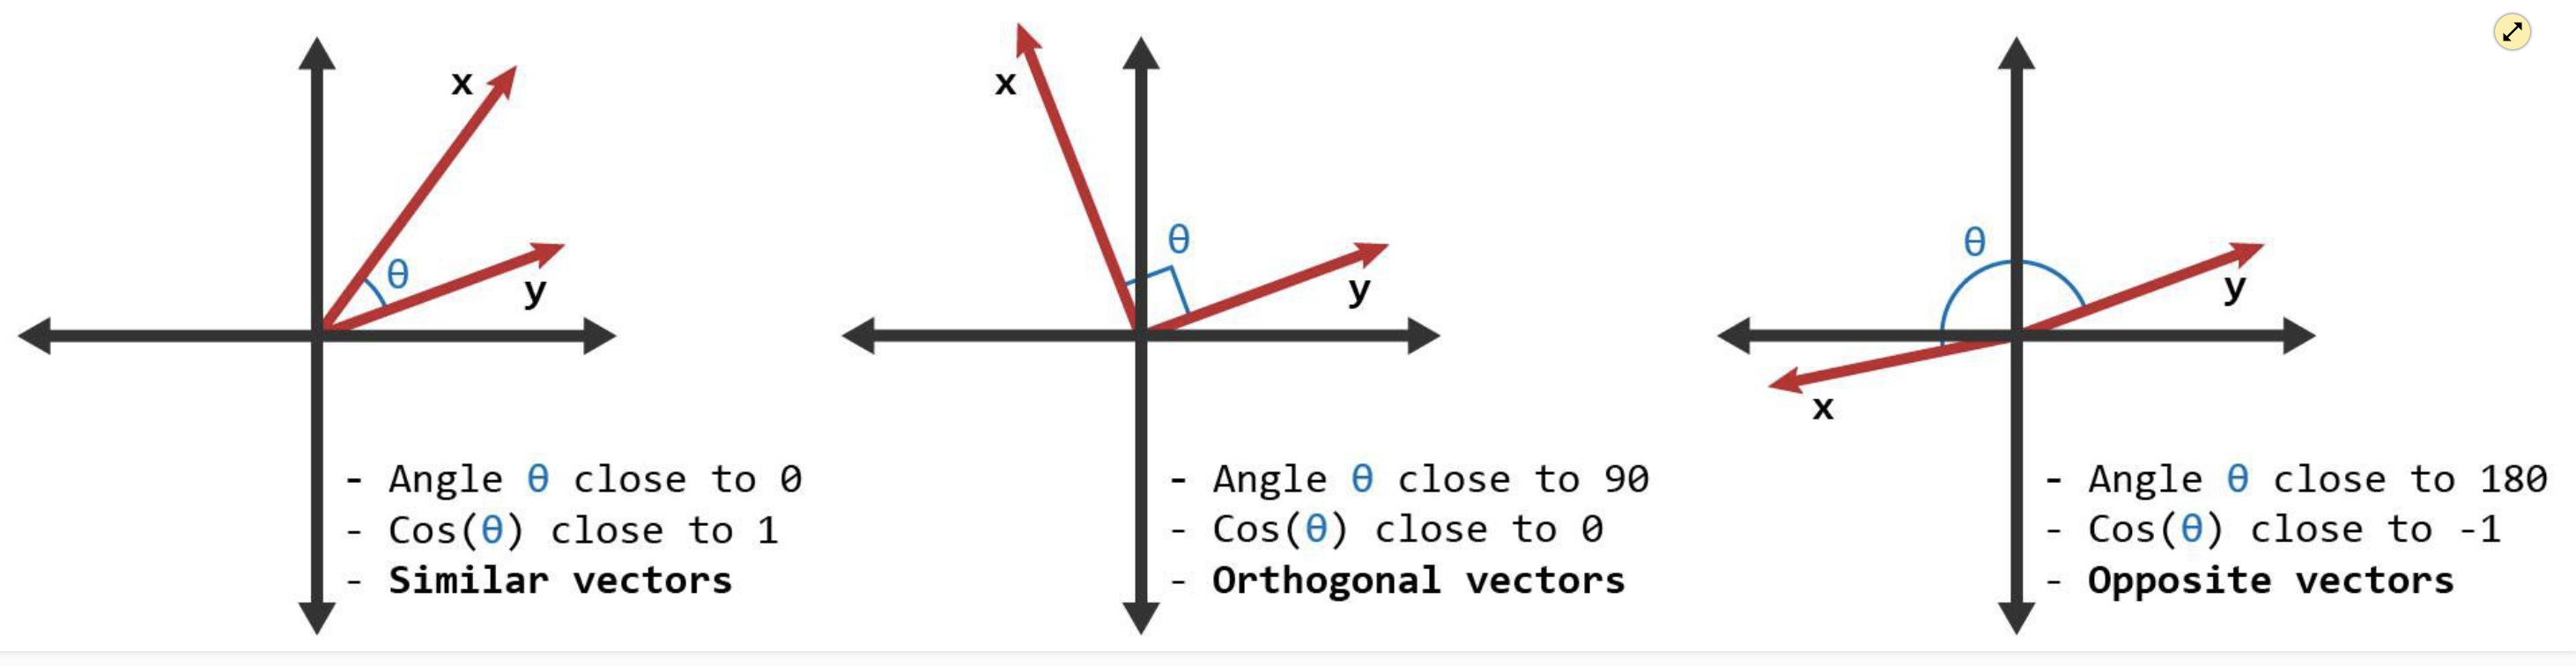

# Calculate Cosine Similarity b/w Vectors

In [121]:
similarity = cosine_similarity(vectors)

In [122]:
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

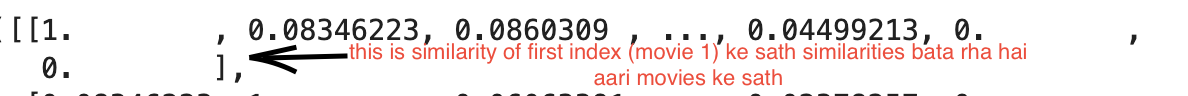

In [124]:
similarity[0] # avatar 

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [125]:
similarity[1]

array([0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
       0.02615329])

In [126]:
similarity[0].shape

(4806,)

In [127]:
sorted(similarity[0])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [128]:
sorted(similarity[0])[-10:-1] #last 10 => one's with highest accuracies because ascending order 

[0.23174488732966073,
 0.23179316248638276,
 0.24455799402225925,
 0.24511108480187255,
 0.25038669783359574,
 0.255608593705383,
 0.2605130246476754,
 0.26901379342448517,
 0.28676966733820225]

In [129]:
sorted(similarity[0], reverse=True)

[1.0000000000000002,
 0.28676966733820225,
 0.26901379342448517,
 0.2605130246476754,
 0.255608593705383,
 0.25038669783359574,
 0.24511108480187255,
 0.24455799402225925,
 0.23179316248638276,
 0.23174488732966073,
 0.2278389747471728,
 0.2252817784447915,
 0.22269966704152225,
 0.21853668936906193,
 0.21239769762143662,
 0.2108663315950723,
 0.2105263157894737,
 0.20443988269091456,
 0.20437977982832192,
 0.20395079136182276,
 0.2029530274475215,
 0.2029530274475215,
 0.20277677641345318,
 0.2024645717996314,
 0.2020475485519274,
 0.1979082783981174,
 0.19767387315371682,
 0.1976738731537168,
 0.19672236884115843,
 0.1925214071641298,
 0.19134594929397597,
 0.19088542889273336,
 0.19088542889273336,
 0.19007487139298027,
 0.1892994097121204,
 0.18731716231633883,
 0.1873171623163388,
 0.18693292157876878,
 0.1860807318911967,
 0.18394180184548975,
 0.18394180184548975,
 0.1813690625275029,
 0.18074256993863339,
 0.17996850826633903,
 0.17954621161490197,
 0.1777046633277277,
 0.17699

In [130]:
# by this we know there are similar movies, to know their title or id, we use enumerate() method
list(enumerate(similarity[0]))

[(0, 1.0000000000000002),
 (1, 0.08346223261119858),
 (2, 0.08603090020146065),
 (3, 0.0734718358370645),
 (4, 0.1892994097121204),
 (5, 0.10838874619051501),
 (6, 0.04024218182927669),
 (7, 0.14673479641335554),
 (8, 0.05923488777590923),
 (9, 0.0967301666813349),
 (10, 0.10259783520851541),
 (11, 0.09464970485606021),
 (12, 0.09037128496931669),
 (13, 0.04499212706658476),
 (14, 0.12824729401064427),
 (15, 0.06282808624375433),
 (16, 0.07894736842105264),
 (17, 0.13977653617040256),
 (18, 0.09493290614465533),
 (19, 0.0830812984794528),
 (20, 0.058038100008800934),
 (21, 0.10968169942141635),
 (22, 0.0662266178532522),
 (23, 0.08740748201220976),
 (24, 0.0533380747062665),
 (25, 0.05101627678885769),
 (26, 0.15389675281277312),
 (27, 0.18693292157876878),
 (28, 0.116543309349613),
 (29, 0.065033247714309),
 (30, 0.06684847767323797),
 (31, 0.15907119074394446),
 (32, 0.08520286456846099),
 (33, 0.09733285267845754),
 (34, 0.0),
 (35, 0.09933992677987831),
 (36, 0.17119059581558146),


In [131]:
sorted(list(enumerate(similarity[0])), reverse = True) 
# but we need it on the basis of similarity 
# we use key parameter for it which takes a lambda function

[(4805, 0.0),
 (4804, 0.0),
 (4803, 0.04499212706658476),
 (4802, 0.046829290579084706),
 (4801, 0.019252140716412975),
 (4800, 0.0),
 (4799, 0.052631578947368425),
 (4798, 0.04223886030955117),
 (4797, 0.0),
 (4796, 0.0),
 (4795, 0.0),
 (4794, 0.0),
 (4793, 0.05407380704358751),
 (4792, 0.0),
 (4791, 0.0),
 (4790, 0.0582716546748065),
 (4789, 0.060833032924035954),
 (4788, 0.0),
 (4787, 0.019117977822546817),
 (4786, 0.0),
 (4785, 0.019672236884115842),
 (4784, 0.043355498476206004),
 (4783, 0.0),
 (4782, 0.025649458802128853),
 (4781, 0.05923488777590923),
 (4780, 0.0),
 (4779, 0.0),
 (4778, 0.0),
 (4777, 0.10814761408717502),
 (4776, 0.0),
 (4775, 0.05647824947249051),
 (4774, 0.0),
 (4773, 0.029617443887954616),
 (4772, 0.023918243661746996),
 (4771, 0.039344473768231684),
 (4770, 0.0),
 (4769, 0.0),
 (4768, 0.0),
 (4767, 0.03627381250550058),
 (4766, 0.017195436249022724),
 (4765, 0.0),
 (4764, 0.0),
 (4763, 0.0),
 (4762, 0.0),
 (4761, 0.02742042485535409),
 (4760, 0.0253347295969

In [132]:
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x: x[1]) 
# if we use x[0] then it'l remain as before (sorted based on indexes)

[(0, 1.0000000000000002),
 (1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574),
 (582, 0.24511108480187255),
 (1204, 0.24455799402225925),
 (1194, 0.23179316248638276),
 (778, 0.23174488732966073),
 (4048, 0.2278389747471728),
 (1920, 0.2252817784447915),
 (61, 0.22269966704152225),
 (2786, 0.21853668936906193),
 (172, 0.21239769762143662),
 (972, 0.2108663315950723),
 (322, 0.2105263157894737),
 (2333, 0.20443988269091456),
 (3608, 0.20437977982832192),
 (260, 0.20395079136182276),
 (151, 0.2029530274475215),
 (4192, 0.2029530274475215),
 (1444, 0.20277677641345318),
 (74, 0.2024645717996314),
 (1089, 0.2020475485519274),
 (3675, 0.1979082783981174),
 (973, 0.19767387315371682),
 (577, 0.1976738731537168),
 (47, 0.19672236884115843),
 (2971, 0.1925214071641298),
 (942, 0.19134594929397597),
 (495, 0.19088542889273336),
 (1201, 0.19088542889273336),
 (305, 0.19007487139298027),
 (4, 0.18929940971

In [133]:
# we will recommend only first 5 recommended movies
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x: x[1])[:6] # avatar khudko hatado

[(0, 1.0000000000000002),
 (1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [134]:
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x: x[1])[1:6] 
# these are the top 5 recommended movies

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [135]:
data.iloc[0]

movie_id                                                19995
title                                                  Avatar
tags        in the 22nd century, a parapleg marin is dispa...
Name: 0, dtype: object

In [136]:
print(data.iloc[1216])
print()
print(data.iloc[2409])
print()
print(data.iloc[3730])
print()
print(data.iloc[507])
print()

print(data.iloc[539])

movie_id                                                  440
title                             Aliens vs Predator: Requiem
tags        a sequel to 2004' alien vs. predator, the icon...
Name: 1216, dtype: object

movie_id                                                  679
title                                                  Aliens
tags        when ripley' lifepod is found by a salvag crew...
Name: 2409, dtype: object

movie_id                                               270938
title                                           Falcon Rising
tags        chapman is an ex-marin in brazil' slums, battl...
Name: 3731, dtype: object

movie_id                                                  602
title                                        Independence Day
tags        on juli 2, a giant alien mothership enter orbi...
Name: 507, dtype: object

movie_id                                                 7450
title                                              Titan A.E.
tags        a young man f

# Final Recommendation Function

In [138]:
data[data['title']=='Avatar'].index

Index([0], dtype='int64')

In [139]:
data[data['title']=='Avatar'].index[0]

0

In [140]:
data[data['title']=='Iron Man'].index[0]

68

In [141]:
def recommend(movie):
    movie_index = data[data['title']==movie].index[0]
    distance = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse = True, key = lambda x: x[1])[1:6] 

    return movie_list

In [142]:
recommend('Iron Man')

[(31, 0.43701422443753773),
 (79, 0.4075438062625764),
 (7, 0.3359355065735125),
 (16, 0.2711138549079501),
 (26, 0.26424909878161656)]

In [143]:
# to print names of movies
def recommend(movie):
    movie_index = data[data['title']==movie].index[0]
    distance = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse = True, key = lambda x: x[1])[1:6]
    
    for i in movie_list:
        print(i[0])

In [144]:
recommend('Avatar')

1216
2409
3730
507
539


In [145]:
data.iloc[1216].title

'Aliens vs Predator: Requiem'

In [146]:
# to print names of movies
def recommend(movie):
    movie_index = data[data['title']==movie].index[0]
    distance = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse = True, key = lambda x: x[1])[1:6]
    
    for i in movie_list:
        print(data.iloc[i[0]].title)

In [147]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [148]:
recommend('Iron Man')

Iron Man 3
Iron Man 2
Avengers: Age of Ultron
The Avengers
Captain America: Civil War


In [149]:
recommend('Inside Out')

Up
Raising Helen
Over the Hedge
Synecdoche, New York
Pieces of April


# 23rd July

In [151]:
# Pickle in Python is primarily used in serializing and deserializing a Python object structure. 
# In other words, it's the process of converting a Python object into a byte stream to store it in a file/database,
# maintain program state across sessions, or transport data over the network.

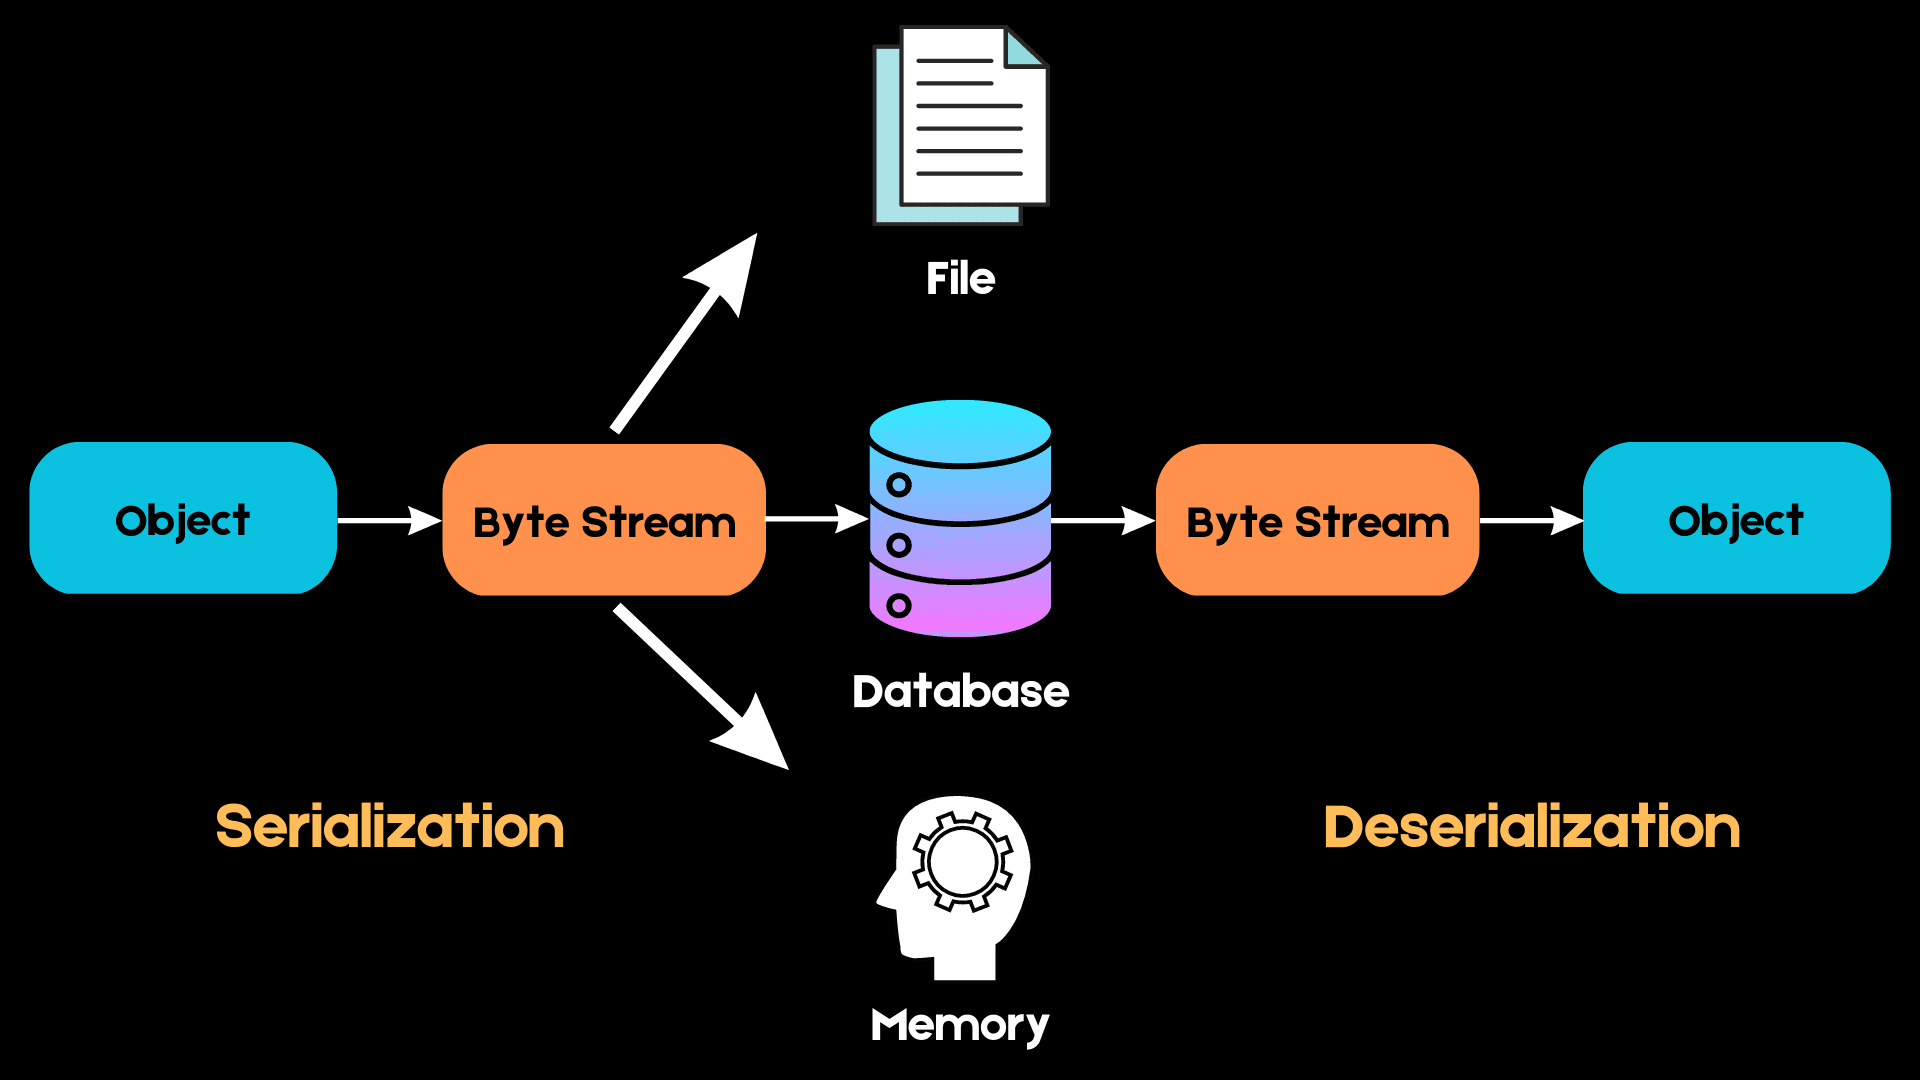

In [153]:
import pickle

In [154]:
data

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q..."
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [211]:
data.to_dict() # transforms dataframe to dictionary

{'movie_id': {0: 19995,
  1: 285,
  2: 206647,
  3: 49026,
  4: 49529,
  5: 559,
  6: 38757,
  7: 99861,
  8: 767,
  9: 209112,
  10: 1452,
  11: 10764,
  12: 58,
  13: 57201,
  14: 49521,
  15: 2454,
  16: 24428,
  17: 1865,
  18: 41154,
  19: 122917,
  20: 1930,
  21: 20662,
  22: 57158,
  23: 2268,
  24: 254,
  25: 597,
  26: 271110,
  27: 44833,
  28: 135397,
  29: 37724,
  30: 558,
  31: 68721,
  32: 12155,
  33: 36668,
  34: 62211,
  35: 8373,
  36: 91314,
  37: 68728,
  38: 102382,
  39: 20526,
  40: 49013,
  41: 44912,
  42: 10193,
  43: 534,
  44: 168259,
  45: 72190,
  46: 127585,
  47: 54138,
  48: 81005,
  49: 64682,
  50: 9543,
  51: 68726,
  52: 38356,
  53: 217,
  54: 105864,
  55: 62177,
  56: 188927,
  57: 10681,
  58: 5174,
  59: 14161,
  60: 17979,
  61: 76757,
  62: 258489,
  63: 411,
  64: 246655,
  65: 155,
  66: 14160,
  67: 15512,
  68: 1726,
  69: 44826,
  70: 8487,
  71: 1735,
  72: 297761,
  73: 2698,
  74: 137113,
  75: 9804,
  76: 14869,
  77: 150540,
  78:

In [213]:
# dump the data => binary form me dump krke hum is object ko use krte h
pickle.dump(data.to_dict(), open('movie_dict.pkl', mode = 'wb')) # takes object and new location as parameters

In [215]:
# dump similarity as well
pickle.dump(similarity, open('Similarity.pkl', mode='wb'))

In [ ]:
# open vsc app.py